# Ion excitation with a short Fourier-limited Gaussian laser pulse
CERN, 2021

In [27]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [28]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define constants for the numerical solution
Omega_val = 1.0
r_val = 0.1
Delta_0_val = 0.5

# Define the system of differential equations in terms of real and imaginary parts
def system(t, y, Omega, r, Delta_0):
    rho_11_re, rho_11_im, rho_12_re, rho_12_im, rho_21_re, rho_21_im, rho_22_re, rho_22_im = y
    
    drho_11_re_dt = 0.5 * Omega * (rho_12_im - rho_21_im)
    drho_11_im_dt = -0.5 * Omega * (rho_12_re - rho_21_re)
    
    drho_12_re_dt = 0.5 * Omega * rho_11_im - (r * t + Delta_0) * rho_12_im + 0.5 * Omega * rho_22_im
    drho_12_im_dt = -0.5 * Omega * rho_11_re + (r * t + Delta_0) * rho_12_re - 0.5 * Omega * rho_22_re
    
    drho_21_re_dt = -0.5 * Omega * rho_11_im + (r * t + Delta_0) * rho_21_im - 0.5 * Omega * rho_22_im
    drho_21_im_dt = 0.5 * Omega * rho_11_re - (r * t + Delta_0) * rho_21_re + 0.5 * Omega * rho_22_re
    
    drho_22_re_dt = 0.5 * Omega * (rho_21_im - rho_12_im)
    drho_22_im_dt = -0.5 * Omega * (rho_21_re - rho_12_re)
    
    return [drho_11_re_dt, drho_11_im_dt, drho_12_re_dt, drho_12_im_dt, drho_21_re_dt, drho_21_im_dt, drho_22_re_dt, drho_22_im_dt]

#

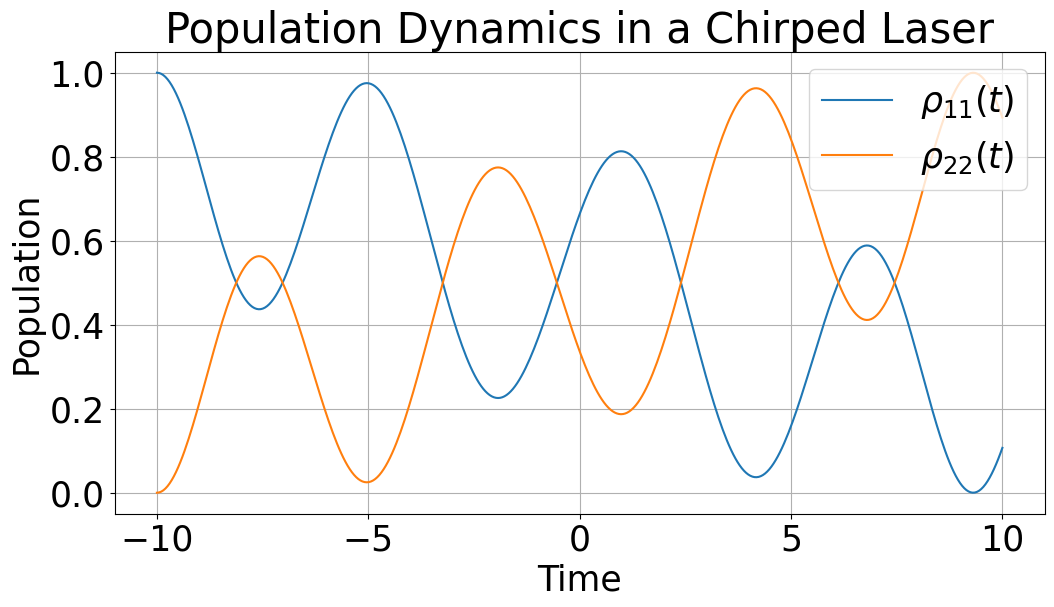

In [35]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def chirped_laser(t, y, Ω, Δ0, r):
    ρ11, ρ12_real, ρ12_imag, ρ22 = y
    ρ12 = ρ12_real + 1j * ρ12_imag
    dρ11_dt = -1j * (0.5 * Ω * ρ12 - 0.5 * Ω * np.conj(ρ12))
    dρ12_dt = -1j * (0.5 * Ω * ρ11 + (r * t + Δ0) * ρ12 - 0.5 * Ω * ρ22)
    dρ22_dt = -1j * (0.5 * Ω * np.conj(ρ12) - 0.5 * Ω * ρ12)
    return [dρ11_dt.real, dρ12_dt.real, dρ12_dt.imag, dρ22_dt.real]

# Parameters
Ω = 1.0  # Rabi frequency
Δ0 = 0.0  # Central detuning
r = 0.1   # Chirp rate

# Initial conditions: population in the ground state at t = -10
t0 = -10
y0 = [1, 0, 0, 0]

# Time points where solution is computed
t_span = (t0, 10)
t_eval = np.linspace(t0, 10, 400)

# Solve the system of differential equations
sol = solve_ivp(chirped_laser, t_span, y0, args=(Ω, Δ0, r), t_eval=t_eval, method='RK45')

# Extract the results
ρ11_sol = sol.y[0]
ρ12_sol = sol.y[1] + 1j * sol.y[2]
ρ22_sol = sol.y[3]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sol.t, ρ11_sol, label=r'$\rho_{11}(t)$')
plt.plot(sol.t, ρ22_sol, label=r'$\rho_{22}(t)$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Population Dynamics in a Chirped Laser')
plt.grid(True)
plt.show()


with widget

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define the function to solve the system of differential equations with given parameters
def solve_chirped_laser(Ω, Δ0, r):
    def chirped_laser(t, y, Ω, Δ0, r):
        ρ11, ρ12_real, ρ12_imag, ρ22 = y
        ρ12 = ρ12_real + 1j * ρ12_imag
        dρ11_dt = -1j * (0.5 * Ω * ρ12 - 0.5 * Ω * np.conj(ρ12))
        dρ12_dt = -1j * (0.5 * Ω * ρ11 + (r * t + Δ0) * ρ12 - 0.5 * Ω * ρ22)
        dρ22_dt = -1j * (0.5 * Ω * np.conj(ρ12) - 0.5 * Ω * ρ12)
        return [dρ11_dt.real, dρ12_dt.real, dρ12_dt.imag, dρ22_dt.real]

    # Initial conditions: population in the ground state at t = -10
    t0 = -10
    y0 = [1, 0, 0, 0]

    # Time points where solution is computed
    t_span = (t0, 10)
    t_eval = np.linspace(t0, 10, 400)

    # Solve the system of differential equations
    sol = solve_ivp(chirped_laser, t_span, y0, args=(Ω, Δ0, r), t_eval=t_eval, method='RK45')

    # Extract the results
    ρ11_sol = sol.y[0]
    ρ12_sol = sol.y[1] + 1j * sol.y[2]
    ρ22_sol = sol.y[3]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(sol.t, ρ11_sol, label=r'$\rho_{11}(t)$')
    plt.plot(sol.t, ρ22_sol, label=r'$\rho_{22}(t)$')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Population Dynamics in a Chirped Laser')
    plt.grid(True)
    plt.show()

# Create the interactive plot with sliders for Ω, r, and Δ0
interact(solve_chirped_laser,
         Ω=widgets.FloatSlider(min=0, max=10.0, step=0.1, value=1.0, description=r'Ω'),
         Δ0=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0.0, description=r'Δ0'),
         r=widgets.FloatSlider(min=-10, max=10, step=0.01, value=0.1, description=r'$r$'));


interactive(children=(FloatSlider(value=1.0, description='Ω', max=10.0), FloatSlider(value=0.0, description='Δ…